# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:

In [113]:
# Importamos las librerías necesarias para la visualización y análisis estadístico
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [116]:
# Creamos una lista de colores corporativos para utilizar en las gráficas
colores = [
    'mediumpurple',   # morado medio
    'darkorange',     # naranja fuerte
    'plum',           # morado claro
    'sandybrown',     # naranja suave
    'purple',         # morado intenso
    'lightsalmon',    # naranja rosado
    'orchid',         # morado rosado
    'chocolate',       # naranja oscuro
    "cadetblue", 
    "mediumseagreen", 
    "seagreen", 
    "teal", 
    "turquoise", 
    "lightseagreen"
]

In [45]:
# Cargamos el DataFrame limpio

df_unificado = pd.read_csv("df_unificado_limpio.csv")

In [ ]:
df_unificado

- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

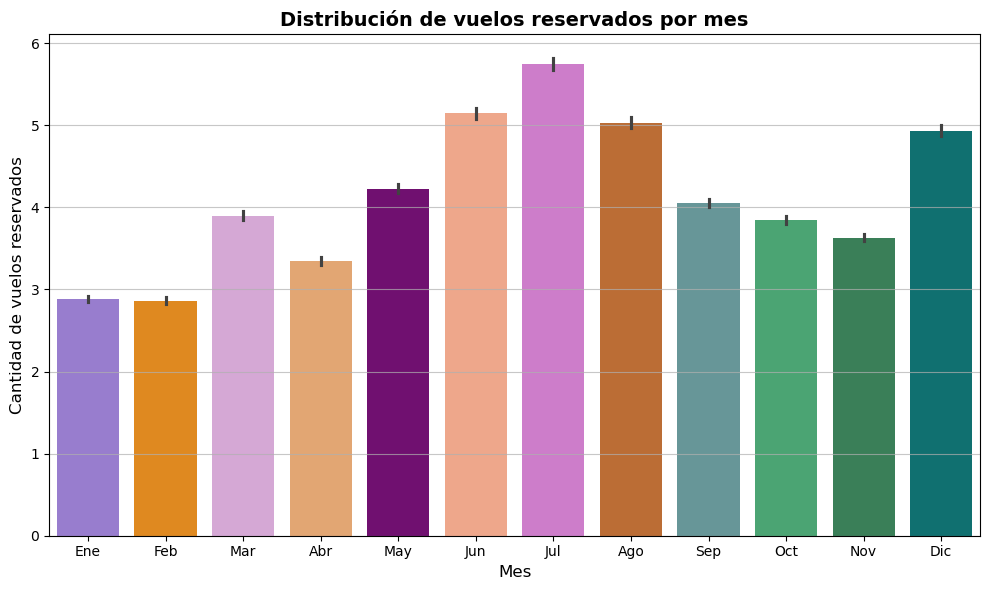

In [117]:
# Escogemos plasmar los datos en un gráfico de barras para visualizar la distribución de vuelos reservados por mes.
# Agrupamos los datos por mes y contamos la cantidad de vuelos reservados.

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Flights Booked', data=df_unificado, palette=colores)
plt.title('Distribución de vuelos reservados por mes', fontsize=14, color='black', weight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de vuelos reservados', fontsize=12)
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y', linestyle='-', alpha= 0.7)
plt.tight_layout()

Conclusión: los resultados de esta grafica arrojan que hay más vuelos reservados en los meses de: junio, julio, agosto y diciembre (temporadas altas) y que en el resto de meses hay una bajada considerable de reservas. El mes en el que más vuelos se realizan es julio.

- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

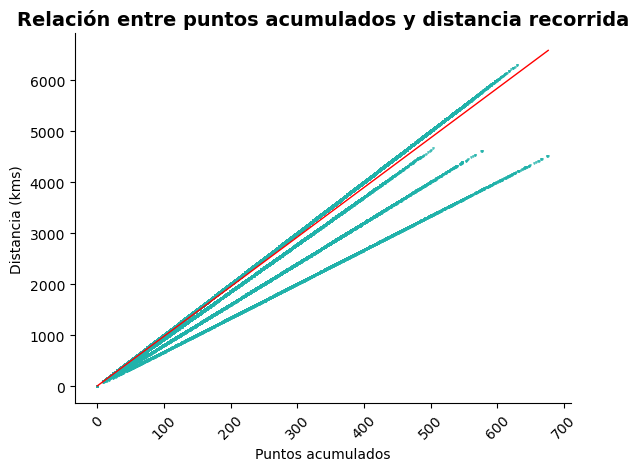

In [118]:
# Escogemos un gráfico de dispersión para ver cuánto tienen relación entre sí las variables indicadas.
sns.regplot(x = "Points Accumulated", y = "Distance", data = df_unificado, marker = "v", line_kws = {"color": "red", "linewidth": 1},scatter_kws = {"color": "lightseagreen", "s": 1})
plt.xlabel("Puntos acumulados")
plt.ylabel("Distancia (kms)")
plt.xticks(rotation= 45)
plt.title("Relación entre puntos acumulados y distancia recorrida",fontsize=14, color='black', weight='bold')
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

Conclusión: se observa de forma clara y significativa la relación entre ambas variables: a más distancia recorrida, más puntos acumulados para el cliente.

- ¿Cuál es la distribución de los clientes por provincia o estado?

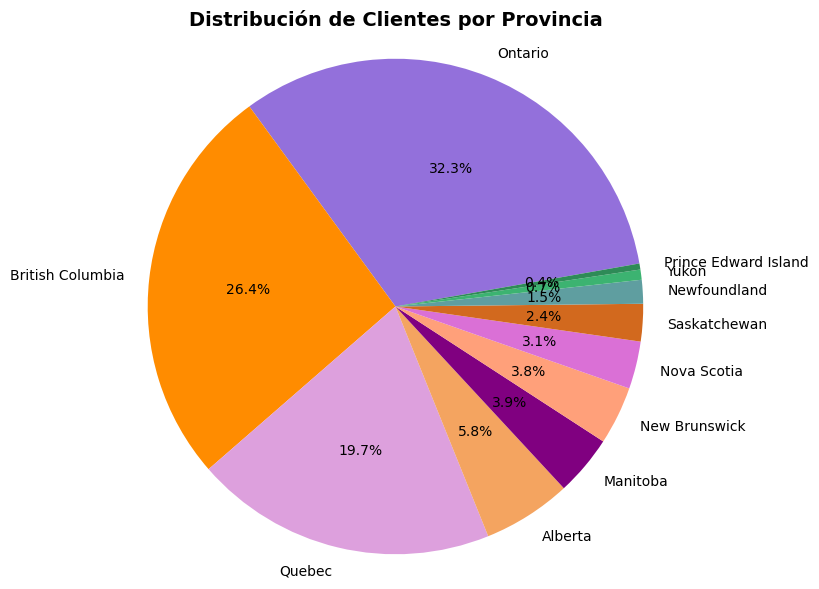

In [119]:
#Escogemos un pie chart ya que es una forma muy clara de mostrar la proporción de clientes por provincia (variable categórica).

plt.figure(figsize=(8, 6))
df_unificado['Province'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=10,
    colors=colores,
    textprops={'color': 'black', 'fontsize': 10}
)
plt.title('Distribución de Clientes por Provincia', fontsize=14, color='black', weight = 'bold')
plt.axis('equal')  # Asegura que el gráfico sea un círculo perfecto.
plt.ylabel('')  # Quitar etiqueta del eje Y para más claridad
plt.tight_layout()
plt.show()

Conclusión: tras el visionado podemos extraer que la provincia con más clientes es Ontario, casi con un tercio del total, y la que menos tiene es Prince Edward Island con tan solo un 0.4% del total.
El salto numérico que más llama la atención es que entre el tercer y el cuarto puesto (Quebec y Alberta respectivamente) hay una notable diferencia.

- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

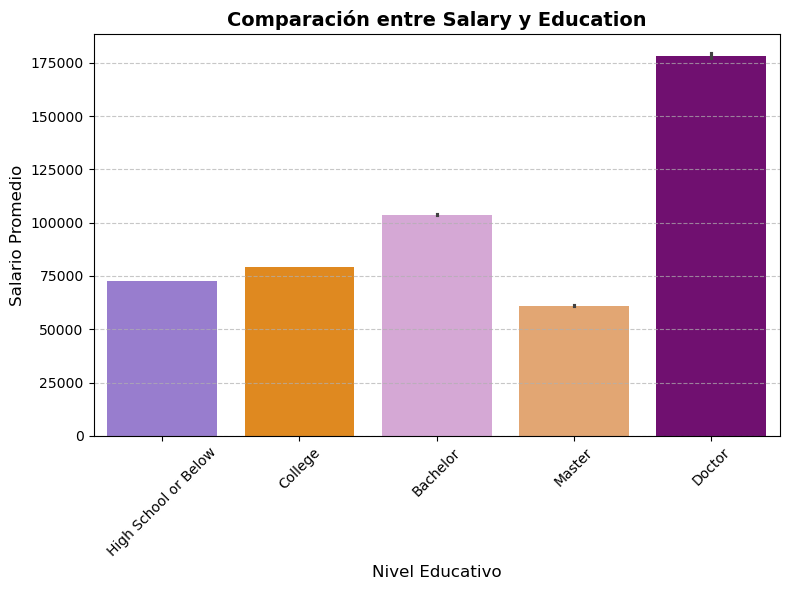

In [103]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Salary', data= df_unificado, palette=colores)
plt.title('Comparación entre Salary y Education', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario Promedio', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.xticks(ticks=range(5), labels=['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.tight_layout()

Conclusión: del análisis de los datos y su visualización, podemos deducir que la tendencia general es que a más nivel educativo más sueldo, con la excepción en este caso, de que las personas con estudios de grado universitario finalizados obtienen mejores sueldos que los que han estudiado un máster.

- ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
# Agrupamos los datos por tipo de tarjeta par visualización inicial de los datos.
df_agrupado = df_unificado.groupby('Loyalty Card').size()

In [ ]:
df_agrupado

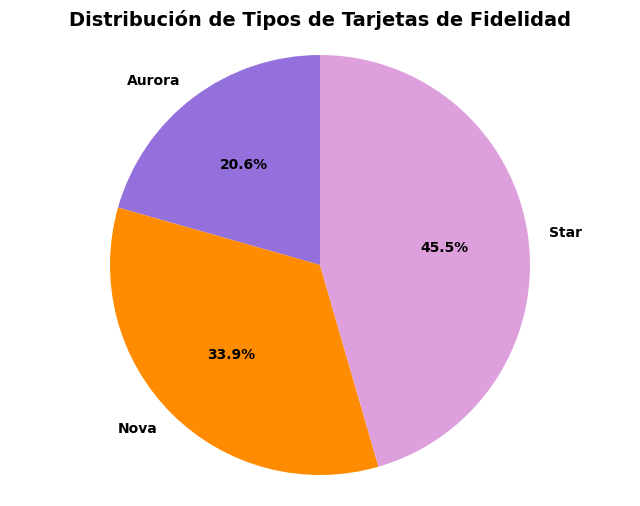

In [105]:
#Escogemos de nuevo el gráfico tipo tarta, puesto que se trata de una variable categórica y queremos mostrar la proporción de cada tipo de tarjeta en el total.
# Esta vez incluimos una leyenda para identificar los tipos de tarjeta.
plt.figure(figsize=(8, 6))
plt.pie(df_agrupado, labels=df_agrupado.index, autopct='%1.1f%%', colors=colores, startangle=90, textprops={'fontweight': 'bold'})
plt.axis('equal')  # Asegura que el gráfico sea un círculo perfecto.
plt.title('Distribución de Tipos de Tarjetas de Fidelidad', fontsize=14, color='black', weight='bold')
plt.show()

Conclusión: tras la visualización de esta gráfica podemos inferir que la mayor parte de los clientes en conjunto tienen la tajerta Star. Sin embargo los clientes que disponen de la tarjeta Aurora junto con los que tienen la tarjeta Nova, superan en conjunto a los que tienen la tarjeta Star.

- ¿Cómo se distribuyen los clientes según su estado civil y género?

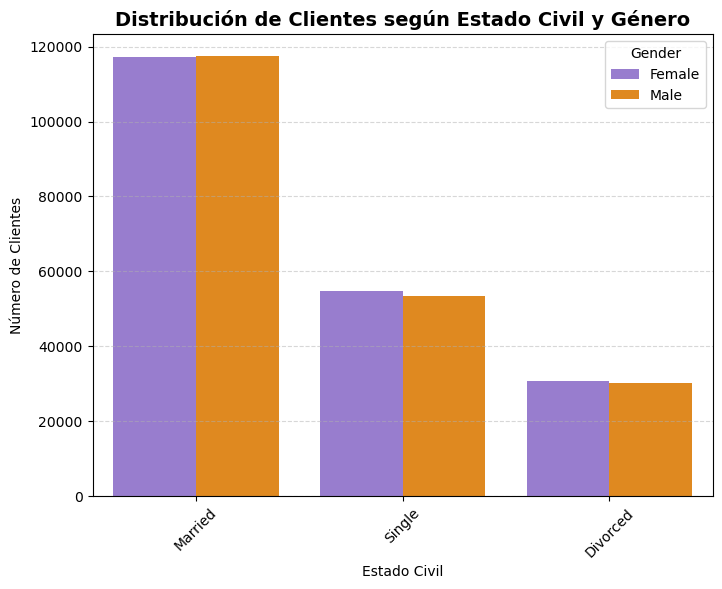

In [ ]:
# Decidimos crear un gráfico de barras agrupadas para poder comparar la distribución del estado civil en función del sexo de los cliente ya que se trata de una medición de más de una variable categórica.
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', hue='Gender', data=df_unificado, palette=colores)
plt.xlabel('Estado Civil')
plt.xticks(rotation=45)
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('Distribución de Clientes según Estado Civil y Género', fontsize=14, color='black', weight='bold')
plt.show()


Conclusión: tras el visionado de la gráfica podemos deducir que la mayoría de la clientela se encuentra casada. 